The dataset is comprised of tab-separated files with phrases from the Rotten Tomatoes dataset. 

train.tsv contains the phrases and their associated sentiment labels.

The sentiment labels are:

0 - negative
1 - somewhat negative
2 - neutral
3 - somewhat positive
4 - positive

In [137]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer


In [138]:

df = pd.read_csv('train.tsv', sep='\t')

dataset = pd.DataFrame(df)
dataset.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


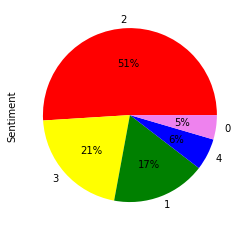

In [139]:

dataset.Sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green", "blue", "violet"])

In [140]:

token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(dataset['Phrase'])




In [141]:
# text_counts would be used as x ( features ) and data["Sentiment"] as y
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, dataset['Sentiment'], test_size=0.2, random_state=1)


## Train Multinomial Naive Bayes Classification model using Sklearn

In [142]:
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_train)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_train, predicted))

MultinomialNB Accuracy: 0.6712642573369217


In [143]:
import pickle
with open('model.pkl','wb') as f:
    pickle.dump(clf,f)

## Calculating the Test Accuracy , Precision , Recall , Confusion Matrix on test data

In [144]:
#Test accuracy
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:", metrics.accuracy_score(y_test, predicted))


MultinomialNB Accuracy: 0.6069140074330386


In [145]:
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predicted)

array([[  398,   650,   322,    41,     8],
       [  367,  2320,  2498,   304,    23],
       [  141,  1469, 12422,  1809,   123],
       [    9,   246,  2566,  3271,   462],
       [    6,    31,   278,   916,   532]])

In [146]:
from sklearn.metrics import confusion_matrix
import numpy as np

cm = confusion_matrix(y_test, predicted)
recall = np.diag(cm) / np.sum(cm, axis = 1)
precision = np.diag(cm) / np.sum(cm, axis = 0)
Recall = np.mean(recall)
Precision = np.mean(precision)
print(f' Recall: {Recall}')
print(f' Precision: {Precision}')

 Recall: 0.45606954870774635
 Precision: 0.5180349529211944


In [153]:
# inference
def predict(review):

  # 0 - negative 1 - somewhat negative 2 - neutral 3 - somewhat positive 4 - positive
  categories = {0: "Negative", 1:"Somewhat Negative", 2:"Neutral", 3: "Somewhat Positive", 4: "Positive"}
  dataset["Phrase"][0] = review
  token = RegexpTokenizer(r'[a-zA-Z0-9]+')
  cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
  d = cv.fit_transform(dataset["Phrase"])
  label = clf.predict(d[0])
  return categories[label.item()]




## Predict the class for the sentence : "I ate pizza last night at dominos which was very healthy and tasty"

In [154]:
review = "A valid explanation for why Trump won't let women on the golf course."
predict(review)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


'Somewhat Negative'

In [155]:
review = "I ate pizza last night which was very healthy and tasty"
predict(review)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


'Somewhat Positive'